**Installing the required Libraries and Packages**

In [ ]:
!pip install xgboost lightgbm catboost tensorflow

In [ ]:
#General Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D

# Path Processing
import os
import os.path
from pathlib import Path
import glob

# Image Processing
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Scaler & Transformation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical # Changed import to use tensorflow.keras.utils
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Accuracy Control
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Optimizers
from tensorflow.keras.optimizers import RMSprop, Adam, Optimizer

# Model Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D, \
                                  Permute, TimeDistributed, Bidirectional, GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# Sklearn Classifiers
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

# Ignoring Warnings
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

**The Path and Lables**

In [ ]:
Spiral_Train_Path = Path("/content/drive/MyDrive/HANDWRITING/Spiral/Train")
Spiral_Test_Path = Path("/content/drive/MyDrive/HANDWRITING/Spiral/Test")

In [ ]:
Spiral_Train_PNG_Path = list(Spiral_Train_Path.glob(r"*/*.png"))
Spiral_Test_PNG_Path = list(Spiral_Test_Path.glob(r"*/*.png"))

In [ ]:
Spiral_Train_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Spiral_Train_PNG_Path))
Spiral_Test_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Spiral_Test_PNG_Path))

**Transformation to a Series Structure**

In [ ]:
Spiral_Train_PNG_Path_Series = pd.Series(Spiral_Train_PNG_Path,name="PNG").astype(str)
Spiral_Train_PNG_Labels_Series = pd.Series(Spiral_Train_PNG_Labels,name="CATEGORY")

In [ ]:
Spiral_Test_PNG_Path_Series = pd.Series(Spiral_Test_PNG_Path,name="PNG").astype(str)
Spiral_Test_PNG_Labels_Series = pd.Series(Spiral_Test_PNG_Labels,name="CATEGORY")

**Transforamtion to a Dataframe Structure**

In [ ]:
Main_Spiral_Train_Data = pd.concat([Spiral_Train_PNG_Path_Series,Spiral_Train_PNG_Labels_Series],axis=1)

In [ ]:
print(Main_Spiral_Train_Data.head(-1))

                                                  PNG   CATEGORY
0   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...  Parkinson
1   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...  Parkinson
2   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...  Parkinson
3   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...  Parkinson
4   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...  Parkinson
..                                                ...        ...
66  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
67  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
68  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
69  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
70  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy

[71 rows x 2 columns]


In [ ]:
Main_Spiral_Test_Data = pd.concat([Spiral_Test_PNG_Path_Series,Spiral_Test_PNG_Labels_Series],axis=1)

In [ ]:
print(Main_Spiral_Test_Data.head(-1))


                                                  PNG   CATEGORY
0   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
1   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
2   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
3   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
4   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
5   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
6   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
7   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
8   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
9   /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
10  /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
11  /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
12  /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
13  /content/drive/MyDrive/HANDWRITING/Spiral/Test...  Parkinson
14  /content/drive/MyDriv

**The Shuffling Step**

In [ ]:
Main_Spiral_Train_Data = Main_Spiral_Train_Data.sample(frac=1).reset_index(drop=True)
Main_Spiral_Test_Data = Main_Spiral_Test_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(Main_Spiral_Train_Data.head(-1))
print("---"*30)
print(Main_Spiral_Test_Data.head(-1))

                                                  PNG   CATEGORY
0   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
1   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
2   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
3   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
4   /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
..                                                ...        ...
66  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...  Parkinson
67  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
68  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...  Parkinson
69  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...    Healthy
70  /content/drive/MyDrive/HANDWRITING/Spiral/Trai...  Parkinson

[71 rows x 2 columns]
------------------------------------------------------------------------------------------
                                                  PNG   CATEGORY
0   /content/drive/MyDrive/HANDWRITING/Sp

**The Data Vizualization**

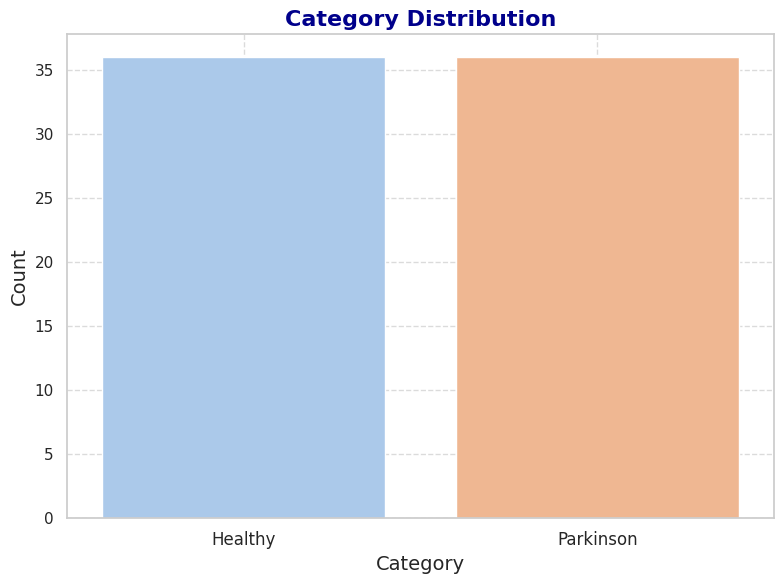

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="CATEGORY", data=Main_Spiral_Train_Data, palette="pastel")

# Add title and labels
plt.title("Category Distribution", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Set x-axis labels to horizontal
plt.xticks(rotation=0, ha='center', fontsize=12)

# Optional: Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

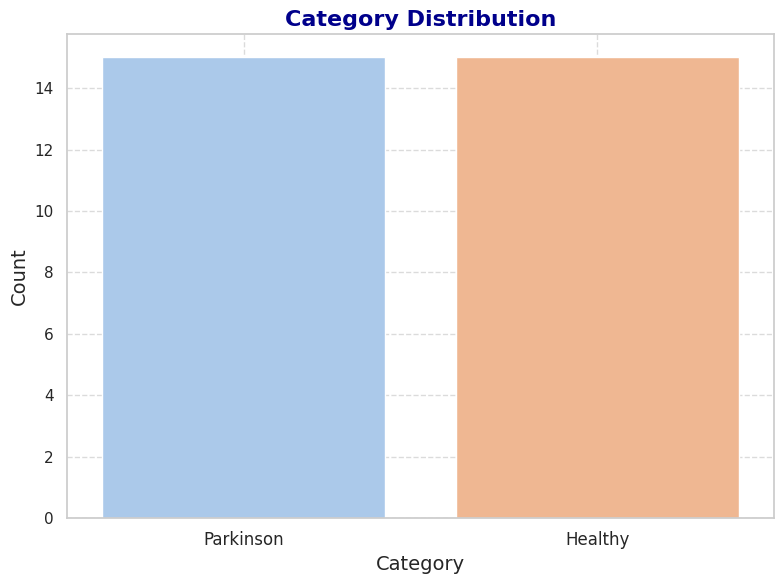

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="CATEGORY", data=Main_Spiral_Test_Data, palette="pastel")

# Add title and labels
plt.title("Category Distribution", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Set x-axis labels to horizontal
plt.xticks(rotation=0, ha='center', fontsize=12)

# Optional: Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


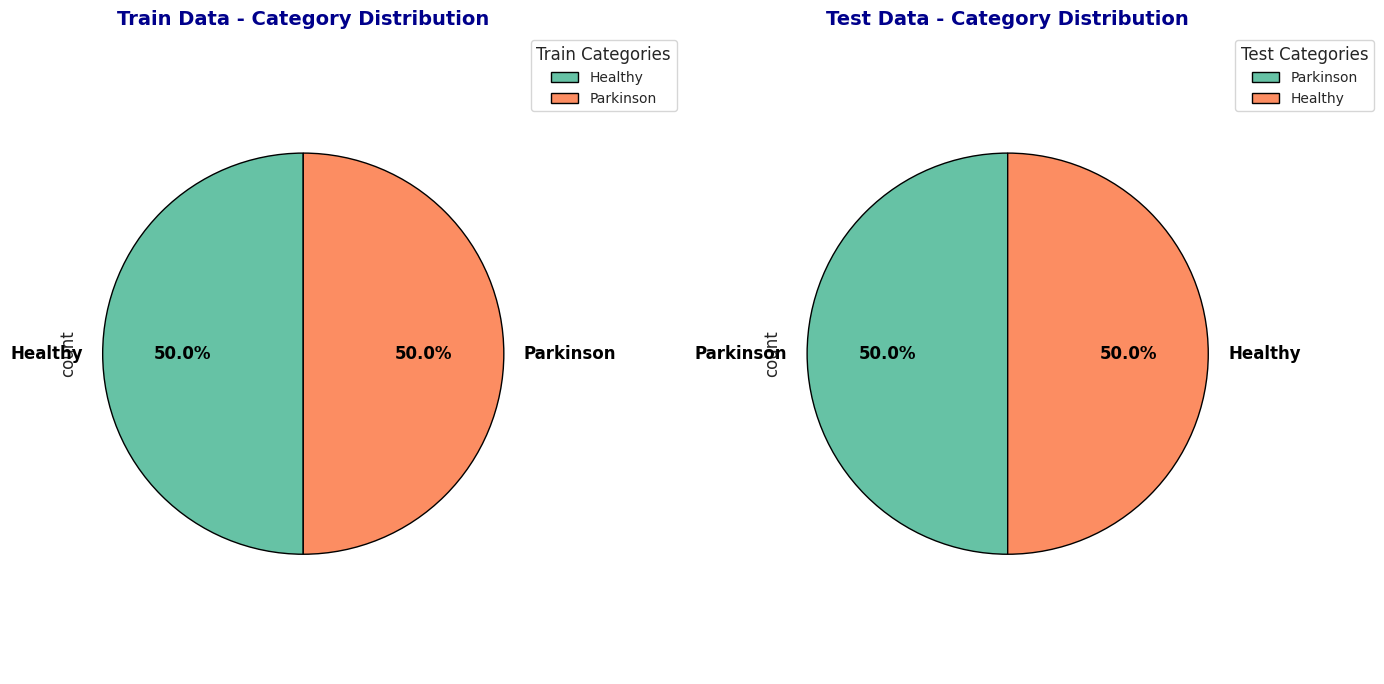

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for a more polished look
sns.set(style="whitegrid", palette="pastel")

# Create a 1x2 grid of subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Smaller overall figure size

# Plot the first pie chart (Train Data)
ax1 = Main_Spiral_Train_Data['CATEGORY'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Percentage with one decimal place
    startangle=90,      # Start angle for the first slice
    colors=sns.color_palette('Set2', len(Main_Spiral_Train_Data['CATEGORY'].unique())),  # Softer, visually pleasing colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds a black border to each slice
    fontsize=12,         # Font size for the labels
    textprops={'color': 'black', 'fontsize': 10, 'weight': 'bold'},  # Font styling for labels
    ax=axes[0]          # Assign the pie chart to the first axis
)

# Set the title for the first plot
axes[0].set_title("Train Data - Category Distribution", fontsize=14, fontweight='bold', color='darkblue')

# Plot the second pie chart (Test Data)
ax2 = Main_Spiral_Test_Data['CATEGORY'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Percentage with one decimal place
    startangle=90,      # Start angle for the first slice
    colors=sns.color_palette('Set2', len(Main_Spiral_Test_Data['CATEGORY'].unique())),  # Softer, visually pleasing colors
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds a black border to each slice
    fontsize=12,         # Font size for the labels
    textprops={'color': 'black', 'fontsize': 10, 'weight': 'bold'},  # Font styling for labels
    ax=axes[1]          # Assign the pie chart to the second axis
)

# Set the title for the second plot
axes[1].set_title("Test Data - Category Distribution", fontsize=14, fontweight='bold', color='darkblue')

# Set the aspect ratio to be equal (circle) for both plots
axes[0].axis('equal')
axes[1].axis('equal')

# Add a separate legend for each plot
axes[0].legend(
    labels=Main_Spiral_Train_Data['CATEGORY'].value_counts().index,
    title="Train Categories",
    loc="upper left",
    fontsize=10,
    bbox_to_anchor=(1, 1)
)

axes[1].legend(
    labels=Main_Spiral_Test_Data['CATEGORY'].value_counts().index,
    title="Test Categories",
    loc="upper left",
    fontsize=10,
    bbox_to_anchor=(1, 1)
)

# Adjust layout for better spacing and fit the legends
plt.tight_layout()

# Display the plot
plt.show()

**Picture format of the Spiral Data Acquired**

Text(0.5, 1.0, 'Healthy')

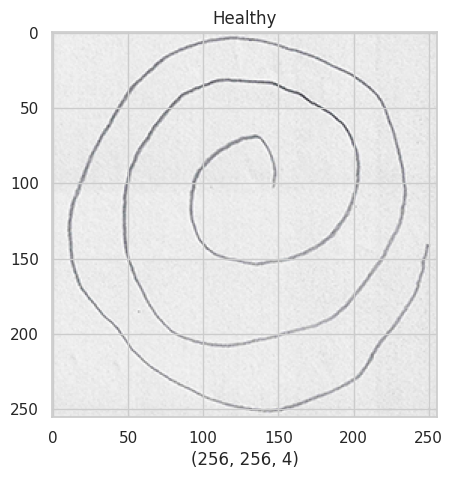

In [ ]:
figure = plt.figure(figsize=(5,5))
x = plt.imread(Main_Spiral_Train_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Spiral_Train_Data["CATEGORY"][0])

Text(0.5, 1.0, 'Parkinson')

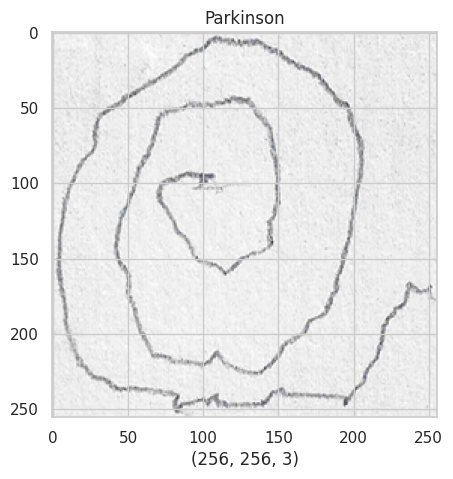

In [ ]:
figure = plt.figure(figsize=(5,5))
x = plt.imread(Main_Spiral_Test_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Spiral_Test_Data["CATEGORY"][0])

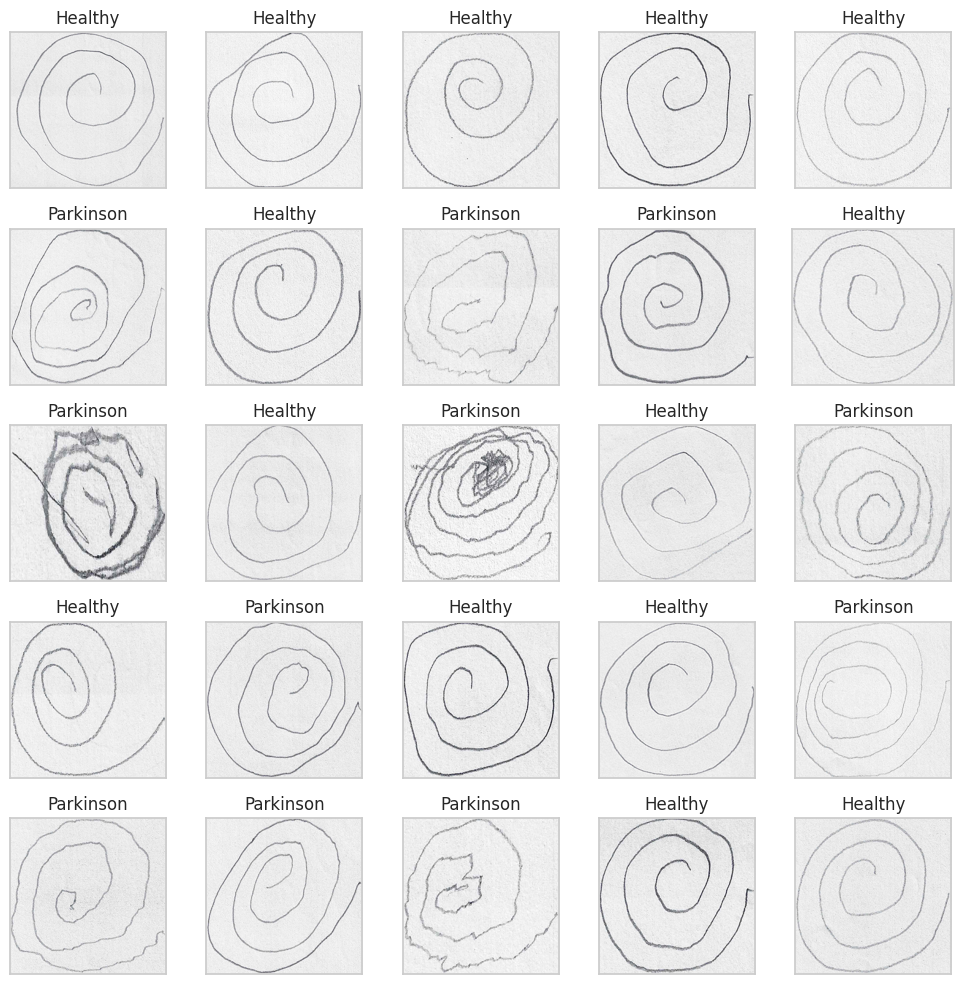

In [ ]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Spiral_Train_Data["PNG"][i]))
    ax.set_title(Main_Spiral_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

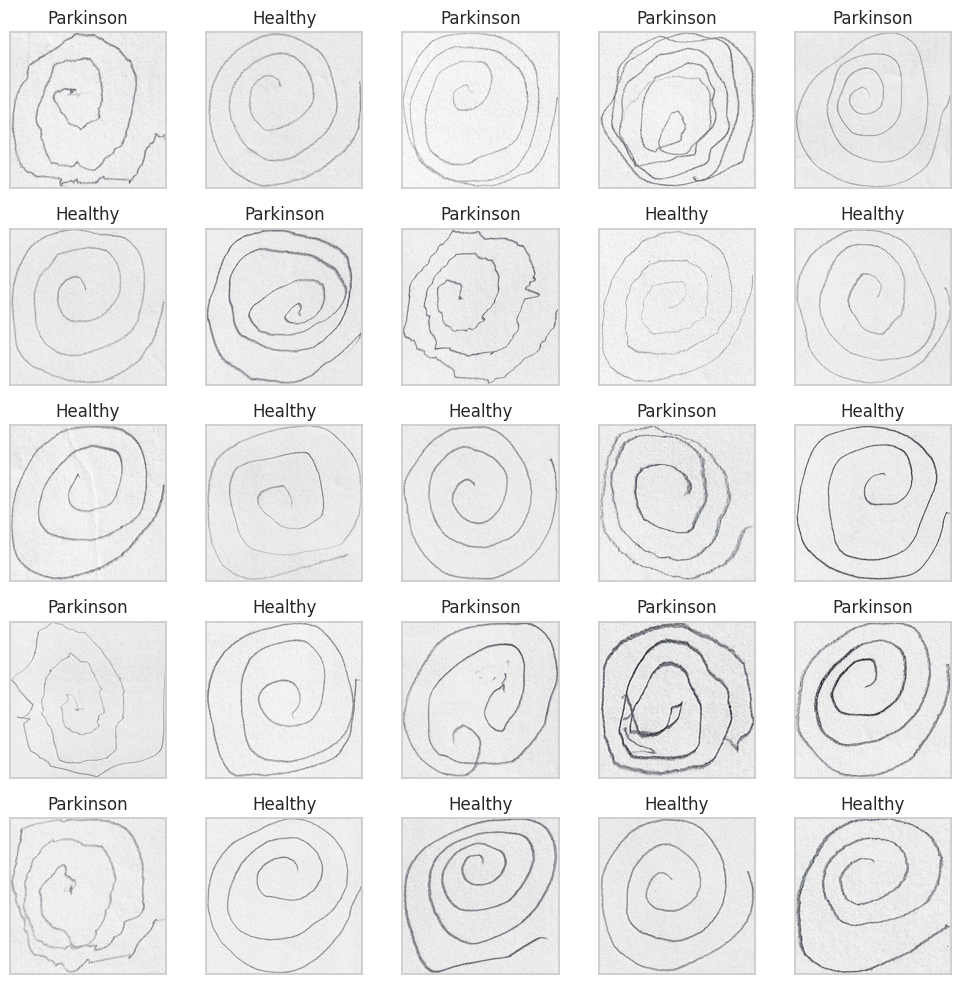

In [ ]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Spiral_Test_Data["PNG"][i]))
    ax.set_title(Main_Spiral_Test_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

**CLASSIFIERS**

In [ ]:
Spiral_New_JPG_Path = []
for i in range(0,72):
    x = cv2.imread(Main_Spiral_Train_Data["PNG"][i])
    x = np.array(x).astype("float32")
    x = x.mean()
    Spiral_New_JPG_Path.append(x)

In [ ]:
Spiral_New_JPG_Path_Series = pd.Series(Spiral_New_JPG_Path,name="PNG")

In [ ]:
print(Spiral_New_JPG_Path_Series)

0     231.016342
1     236.156494
2     233.377029
3     229.572205
4     236.482437
         ...    
67    228.855759
68    231.546799
69    230.661087
70    231.410538
71    230.887024
Name: PNG, Length: 72, dtype: float32


In [ ]:
encode = preprocessing.LabelEncoder()

In [ ]:
Spiral_New_JPG_Labels = encode.fit_transform(Main_Spiral_Train_Data["CATEGORY"])

In [ ]:
Spiral_New_JPG_Labels_Series = pd.Series(Spiral_New_JPG_Labels,name="CATEGORY")

In [ ]:
print(Spiral_New_JPG_Labels_Series)

0     0
1     0
2     0
3     0
4     0
     ..
67    0
68    1
69    0
70    1
71    0
Name: CATEGORY, Length: 72, dtype: int64


In [ ]:
Main_Spiral_New_Data = pd.concat([Spiral_New_JPG_Path_Series,Spiral_New_JPG_Labels_Series],axis=1)

In [ ]:
print(Main_Spiral_New_Data)

           PNG  CATEGORY
0   231.016342         0
1   236.156494         0
2   233.377029         0
3   229.572205         0
4   236.482437         0
..         ...       ...
67  228.855759         0
68  231.546799         1
69  230.661087         0
70  231.410538         1
71  230.887024         0

[72 rows x 2 columns]


**TRAIN AND TEST**

In [ ]:
x = Main_Spiral_New_Data[["PNG"]]
y = Main_Spiral_New_Data["CATEGORY"]

In [ ]:
print(x.shape)

(72, 1)


In [ ]:
print(y.shape)

(72,)


In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(64, 1)
(8, 1)
(64,)
(8,)


**MODEL EVALUATION**

In [ ]:
lr = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
dtc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)
lgbmc = LGBMClassifier(verbose=-1).fit(xTrain,yTrain)
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)
svm = SVC(probability = True, kernel='linear', random_state=42).fit(xTrain, yTrain)

import warnings
warnings.filterwarnings("ignore", message=".*No further splits with positive gain, best gain: -inf.*")  # Specific LightGBM warning

In [ ]:
modelsc = [lr,gnb,knnc,dtc,rfc,gbmc,xgbc,lgbmc,catbc,svm]

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, log_loss, f1_score, mean_squared_error
import numpy as np

# Create an empty list to store the results
results = []

for model in modelsc:
    name = model.__class__.__name__

    # Predictions
    predict = model.predict(xTest)

    # Accuracy
    accuracy = accuracy_score(yTest, predict)

    # Precision
    precision = precision_score(yTest, predict, average='binary')  # Assuming binary classification, change average if needed

    # Log Loss
    try:
        logloss = log_loss(yTest, model.predict_proba(xTest))  # For models with predict_proba
    except:
        logloss = np.nan  # Models that don’t support predict_proba will have NaN for logloss

    # F1 Score
    f1 = f1_score(yTest, predict, average='binary')  # Assuming binary classification

    # Mean Squared Error
    mse = mean_squared_error(yTest, predict)  # Corrected to use mean_squared_error directly

    # Append the results to the list
    results.append([name, accuracy, precision, logloss, f1, np.sqrt(mse)])

# Create a pandas DataFrame from the results list
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Log Loss", "F1 Score", "Root Mean Squared Error"])

# Display the table
print(results_df)

                        Model  Accuracy  Precision  Log Loss  F1 Score  \
0          LogisticRegression     0.250   0.250000  0.726682  0.400000   
1                  GaussianNB     0.625   0.400000  0.632668  0.571429   
2        KNeighborsClassifier     0.625   0.400000  0.664428  0.571429   
3      DecisionTreeClassifier     0.750   0.500000  9.010913  0.500000   
4      RandomForestClassifier     0.750   0.500000  0.447283  0.500000   
5  GradientBoostingClassifier     0.750   0.500000  0.523009  0.500000   
6               XGBClassifier     0.625   0.400000  0.762986  0.571429   
7              LGBMClassifier     0.500   0.333333  0.617247  0.500000   
8          CatBoostClassifier     0.625   0.400000  0.532826  0.571429   
9                         SVC     0.250   0.250000  0.641216  0.400000   

   Root Mean Squared Error  
0                 0.866025  
1                 0.612372  
2                 0.612372  
3                 0.500000  
4                 0.500000  
5          

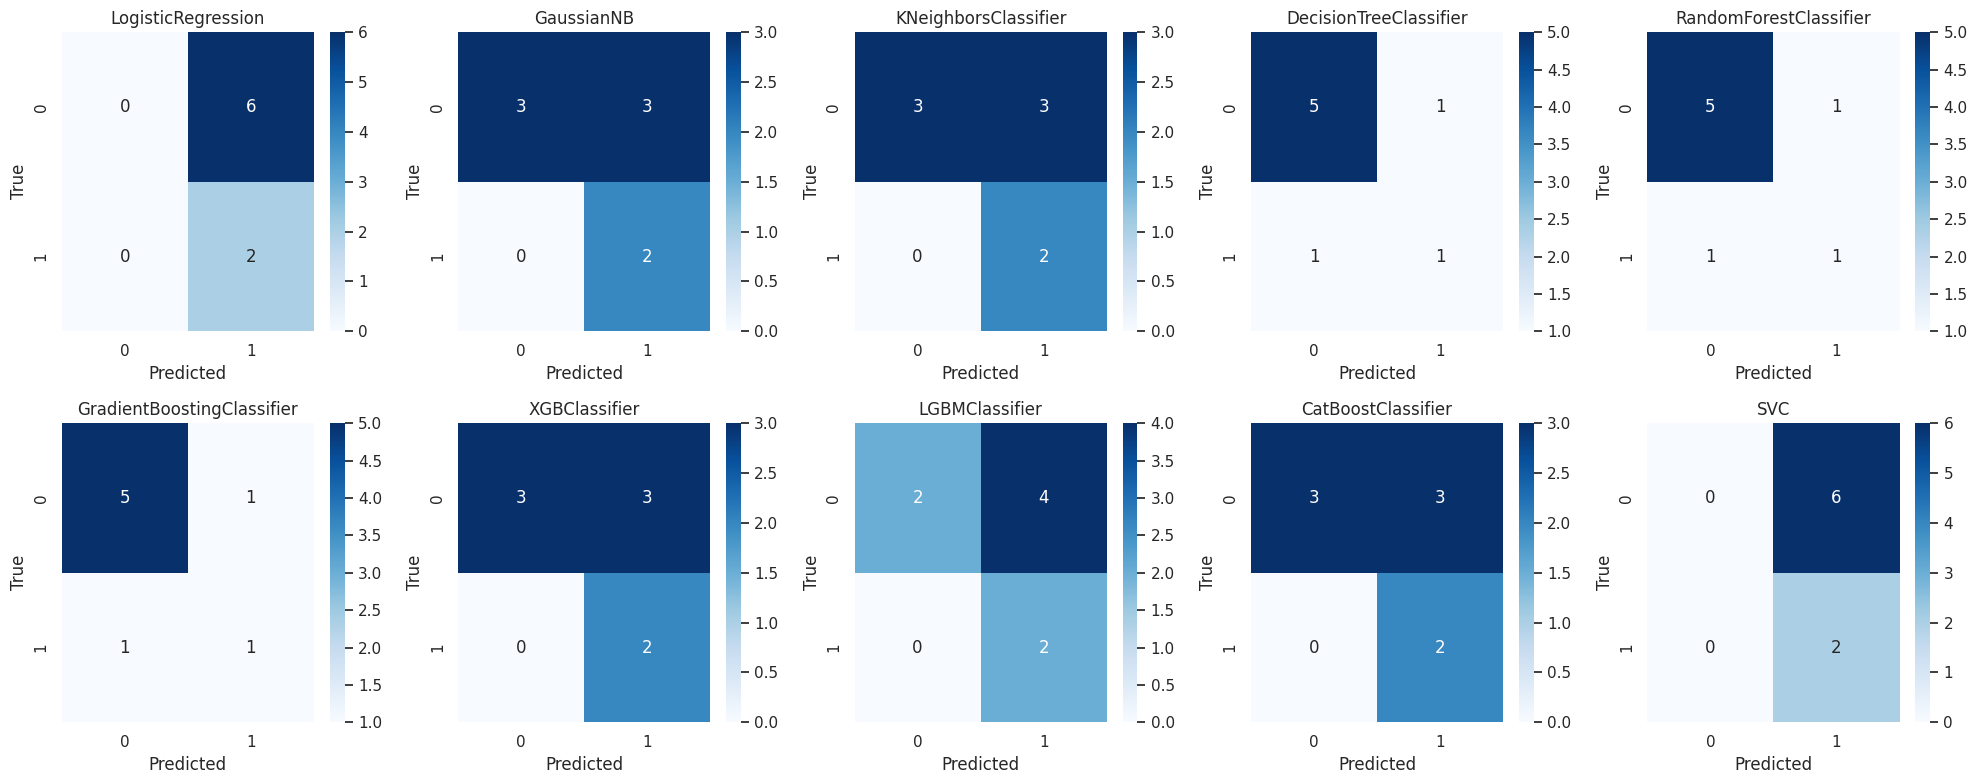

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, model in enumerate(modelsc):
    y_pred = model.predict(xTest)
    cm = confusion_matrix(yTest, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(model.__class__.__name__)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")

plt.tight_layout()
plt.show()

In [ ]:
# Find the model with the highest accuracy
best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']

# Find the model with the lowest log loss (if available)
best_logloss_model = results_df.loc[results_df['Log Loss'].idxmin(), 'Model']

# Find the model with the highest precision
best_precision_model = results_df.loc[results_df['Precision'].idxmax(), 'Model']

# Find the model with the highest F1 score
best_f1_model = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']

# Find the model with the lowest root mean squared error
best_rmse_model = results_df.loc[results_df['Root Mean Squared Error'].idxmin(), 'Model']

print("Best model based on accuracy:", best_accuracy_model)
print("Best model based on log loss:", best_logloss_model)
print("Best model based on precision:", best_precision_model)
print("Best model based on F1 score:", best_f1_model)
print("Best model based on RMSE:", best_rmse_model)

Best model based on accuracy: DecisionTreeClassifier
Best model based on log loss: RandomForestClassifier
Best model based on precision: DecisionTreeClassifier
Best model based on F1 score: GaussianNB
Best model based on RMSE: DecisionTreeClassifier


**IMAGE GENERATOR PROCESS**

In [ ]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.7,
                                    shear_range=0.7,
                                    rotation_range=50,
                                    horizontal_flip=True,
                                     brightness_range=[0.2,0.9],
                                     vertical_flip=True,
                                    validation_split=0.1)

In [ ]:
Train_Spiral_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Spiral_Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="grayscale",
                                                   class_mode="categorical",
                                                       subset="training")

Found 65 validated image filenames belonging to 2 classes.


In [ ]:
Validation_Spiral_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Spiral_Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="grayscale",
                                                   class_mode="categorical",
                                                       subset="validation")

Found 7 validated image filenames belonging to 2 classes.


In [ ]:
Test_Spiral_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Spiral_Test_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="grayscale",
                                                   class_mode="categorical")

Found 30 validated image filenames belonging to 2 classes.


In [ ]:
print("TRAIN: ")
print(Train_Spiral_Set.class_indices)
print(Train_Spiral_Set.classes[0:5])
print(Train_Spiral_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Spiral_Set.class_indices)
print(Validation_Spiral_Set.classes[0:5])
print(Validation_Spiral_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Spiral_Set.class_indices)
print(Test_Spiral_Set.classes[0:5])
print(Test_Spiral_Set.image_shape)

TRAIN: 
{'Healthy': 0, 'Parkinson': 1}
[1, 1, 0, 1, 0]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'Healthy': 0, 'Parkinson': 1}
[0, 0, 0, 0, 0]
(256, 256, 1)
------------------------------------------------------------
TEST: 
{'Healthy': 0, 'Parkinson': 1}
[1, 0, 1, 1, 1]
(256, 256, 1)


**TRANSFORMATION**

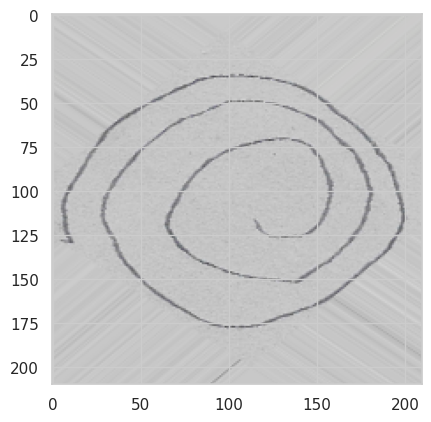

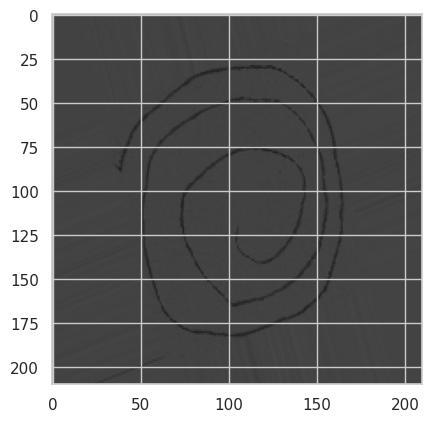

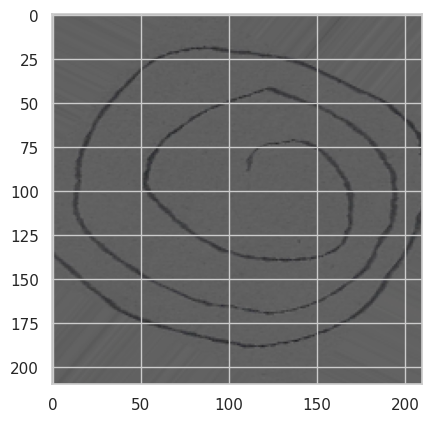

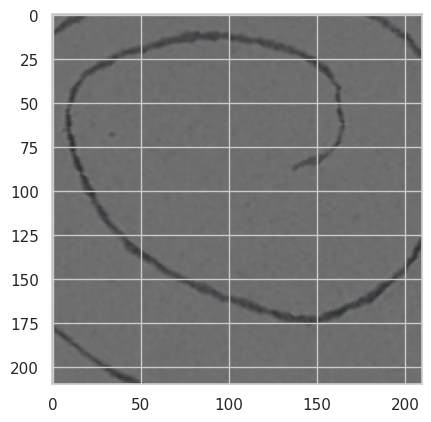

In [ ]:
example_Image = Main_Spiral_Train_Data["PNG"][30]
Load_Image = image.load_img(example_Image,target_size=(210,210))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)
i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=5):
    plt.figure(i)
    Image = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

**`MODEL - CNN**

In [ ]:
Call_Back_Early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                   patience=7,
                                                   mode="max")
Call_Back_Check = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_model.keras")

In [ ]:
Model_One = Sequential()

#
Model_One.add(Conv2D(2,(15,15),activation="relu",
                 input_shape=(256,256,1)))
Model_One.add(MaxPooling2D((2,2)))
Model_One.add(Dropout(0.2))
#
Model_One.add(Conv2D(4,(10,10),activation="relu",
                 strides=(2,2)))
Model_One.add(MaxPooling2D((2,2)))
Model_One.add(Dropout(0.2))

#
Model_One.add(Flatten())
Model_One.add(Dropout(0.5))
Model_One.add(Dense(512,activation="relu"))
Model_One.add(Dense(2,activation="softmax"))

In [ ]:
Model_One.compile(optimizer=RMSprop(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
CNN_Model_One = Model_One.fit(Train_Spiral_Set,
                      validation_data=Validation_Spiral_Set,
                            callbacks=[Call_Back_Check,Call_Back_Early],
                      epochs=15)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4573 - loss: 2.1653 - val_accuracy: 0.4286 - val_loss: 0.6913
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.3445 - loss: 0.6989 - val_accuracy: 0.8571 - val_loss: 0.6897
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.3446 - loss: 0.6958 - val_accuracy: 0.2857 - val_loss: 0.6968
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.3674 - loss: 0.6980 - val_accuracy: 0.2857 - val_loss: 0.6910
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5230 - loss: 0.6938 - val_accuracy: 0.2857 - val_loss: 0.6973
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4769 - loss: 0.6934 - val_accuracy: 0.1429 - val_loss: 0.7029
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.6401 - loss: 0.6835 - val_accuracy: 0.1429 - val_loss: 0.7134
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.6861 - loss: 0.6818 - val_accuracy: 0.1429 - val_loss: 0.7215
Epoch 9/1

In [ ]:
Model_Results = Model_One.evaluate(Test_Spiral_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step - accuracy: 0.4667 - loss: 0.7009
LOSS:  0.7009
ACCURACY:  0.47


**MODEL - ANN**

In [ ]:
Model_Two = tf.keras.models.Sequential([
  # inputs
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),
  # hiddens layers
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(2,activation="softmax")
])

In [ ]:
lossfunc = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
Model_Two.compile(optimizer='adam', loss=lossfunc, metrics=['accuracy'])

In [ ]:
ANN_Model = Model_Two.fit(Train_Spiral_Set,
                      validation_data=Validation_Spiral_Set,
                      epochs=15,batch_size=10)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 450ms/step - accuracy: 0.4805 - loss: 0.6907 - val_accuracy: 0.8571 - val_loss: 0.6851
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5504 - loss: 0.6996 - val_accuracy: 0.1429 - val_loss: 0.7684
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5969 - loss: 0.6816 - val_accuracy: 0.1429 - val_loss: 0.7578
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4385 - loss: 0.6979 - val_accuracy: 0.1429 - val_loss: 0.7145
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5308 - loss: 0.6904 - val_accuracy: 0.1429 - val_loss: 0.7141
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.3903 - loss: 0.7009 - val_accuracy: 0.1429 - val_loss: 0.7072
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4845 - loss: 0.6936 - val_accuracy: 0.1429 - val_loss: 0.7144
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5462 - loss: 0.6876 - val_accuracy: 0.1429 - val_loss: 0.727

In [ ]:
Model_Results_Two = Model_Two.evaluate(Test_Spiral_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.5000 - loss: 0.6929
LOSS:  0.7009
ACCURACY:  0.47


**PREDICTION PROCESS**

In [ ]:
import joblib

joblib.dump(dtc, 'Spiral_DTC.joblib')

# Load the model from the file
loaded_dtc = joblib.load('Spiral_DTC.joblib')


In [ ]:
import joblib
import numpy as np
from PIL import Image
from keras.preprocessing import image

# Load the saved model
loaded_dtc = joblib.load('Spiral_DTC.joblib')

def predict_parkinson(image_path):

    try:
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(210, 210))  # Adjust target_size if needed
        img_array = image.img_to_array(img)
        img_array = img_array.mean()  # Calculate the mean pixel value
        img_array = np.array(img_array).reshape(1, -1)  # Reshape for prediction

        # Make the prediction
        prediction = loaded_dtc.predict(img_array)[0]

        # Determine the class label
        if prediction == 0:
          result = "The Patient is Healthy"
        elif prediction == 1:
          result = "The Patient is affected by Parkinson's Disease"
        else:
          result = "Unknown" # Handle cases where prediction is not 0 or 1.

        return result

    except FileNotFoundError:
        return "Error: Image file not found."
    except Exception as e:
        return f"Error during prediction: {e}"

# Example usage:
image_path = "/content/gdrive/MyDrive/HANDWRITING/Spiral/Test/Parkinson/V01PE01.png" # Replace with the path to your image
prediction = predict_parkinson(image_path)
print(f"Prediction: {prediction}")

Prediction: Error: Image file not found.
